In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import logging
import math
import os
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
from keras import optimizers
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

df= pd.read_csv(os.path.join("C:\ml_workspace\SK하이닉스 13~23.csv"), encoding='utf8')
df.describe()

,Open,Higt,Low,Close,Volume,RSI,RSISignal,CCI,CCISignal,UpDI,...,Close5ma,Close10ma,Close20ma,Close60ma,INDNB,INSNB,FNB,Call,EX,SSR
count,2566.000000,2566.000000,2566.000000,2566.000000,2.566000e+03,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,...,2566.000000,2566.000000,2566.000000,2566.000000,2.566000e+03,2.566000e+03,2.566000e+03,2566.000000,2566.000000,2566.000000
mean,68822.798129,69714.127046,67836.730320,68737.996882,3.723025e+06,0.519573,0.519210,8.346485,8.160978,24.632529,...,100.121871,100.275908,100.566668,101.683562,-3.927260e+04,-4.770122e+04,7.086816e+04,1.633597,1151.659158,4.558009
std,30681.834072,31095.626517,30178.490951,30629.049394,1.960378e+06,0.159519,0.131400,107.891457,77.176467,10.247633,...,2.336750,3.458962,4.975842,8.721343,9.203666e+05,5.702654e+05,8.078597e+05,0.760747,76.541358,4.379647
min,23850.000000,24200.000000,23600.000000,23700.000000,8.425620e+05,0.066300,0.137700,-276.060000,-158.160000,1.430000,...,89.470000,83.890000,77.860000,72.630000,-4.928607e+06,-9.953327e+06,-8.331951e+06,0.000000,1008.500000,0.000000
25%,41000.000000,41350.000000,40350.000000,40900.000000,2.442582e+06,0.405450,0.425975,-76.547500,-59.485000,17.350000,...,98.610000,98.042500,97.297500,95.250000,-4.456775e+05,-2.817880e+05,-2.763015e+05,1.230000,1104.625000,1.400000
50%,71800.000000,73000.000000,70800.000000,71750.000000,3.258910e+06,0.515400,0.513750,13.300000,10.525000,23.590000,...,100.080000,100.230000,100.415000,101.410000,-2.561400e+04,-3.520400e+04,6.506750e+04,1.490000,1134.400000,3.445000
75%,87900.000000,89000.000000,86500.000000,87875.000000,4.465971e+06,0.634575,0.614100,90.610000,75.535000,30.812500,...,101.650000,102.467500,103.880000,107.635000,3.670838e+05,2.102022e+05,3.976848e+05,2.217500,1187.500000,6.445000
max,149000.000000,150500.000000,142500.000000,148500.000000,2.101944e+07,0.972600,0.902800,361.630000,168.680000,68.210000,...,112.250000,113.030000,118.840000,135.500000,7.821111e+06,3.168361e+06,1.065220e+07,3.770000,1439.900000,59.530000


In [85]:
open_value_test = df.loc[df['Open'] > 40000]
open_value_test

,Date,Open,Higt,Low,Close,Volume,RSI,RSISignal,CCI,CCISignal,...,Close5ma,Close10ma,Close20ma,Close60ma,INDNB,INSNB,FNB,Call,EX,SSR
324,2014-04-23,40200,40850,40050,40750,6302966,0.8088,0.6411,170.66,137.01,...,103.32,106.15,108.10,106.87,-3253028,882175,2379013,2.49,1039.8,2.85
325,2014-04-24,40850,40900,40150,40900,4202633,0.7920,0.6713,134.90,136.59,...,102.22,105.66,108.04,107.07,-1374110,171771,1219399,2.49,1039.2,9.14
326,2014-04-25,41100,41350,40650,40750,6413507,0.8049,0.6980,120.38,133.34,...,101.07,104.27,107.12,106.55,-1091322,-1849788,2900670,2.50,1041.5,2.78
327,2014-04-28,40450,40800,39900,40500,2962593,0.8049,0.7194,80.43,122.76,...,99.90,102.69,105.84,105.77,-299651,77661,249070,2.49,1035.0,5.01
328,2014-04-29,40250,40500,39600,39700,2864162,0.6694,0.7094,49.35,108.08,...,97.98,100.08,103.39,103.54,442888,-318788,-133750,2.49,1030.6,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,2023-05-30,113200,113400,109500,110300,9058509,0.9167,0.7677,160.56,137.10,...,106.34,111.41,117.90,123.97,-625685,-688972,1445497,3.51,1324.9,10.53
2562,2023-05-31,110000,110900,108500,108600,8166685,0.8754,0.7892,122.82,134.25,...,102.59,107.72,114.91,121.58,-207956,-1400103,1617128,3.50,1327.2,7.38
2563,2023-06-01,106000,110500,106000,110300,5553560,0.9000,0.8114,100.59,127.52,...,101.77,107.44,115.49,123.01,-184903,-962399,1155756,3.53,1321.6,8.06
2564,2023-06-02,111000,112700,109200,110300,3991904,0.8969,0.8285,97.43,121.50,...,100.51,105.72,114.26,122.52,3195,-32958,71478,3.51,1305.7,5.89


In [86]:
price_indicator = df.loc[:,'Open':'Close'].values[1:].astype(float) # 가격 관련 지표 
volume_indicator = df.loc[:,'Volume':'Volume'].values[1:].astype(float) # 거래량 관련 지표 
etc_indicator = df.loc[:,'RSI':'SSR'].values[1:].astype(float) # 추세 또는 거래량 활용 지표 

scaler = MinMaxScaler(feature_range=(0, 1)) # 0~1 값으로 스케일링
scaler_etc = MinMaxScaler(feature_range=(-1, 1)) # -1~1 값으로 스케일링

scaled_price_indicator = scaler.fit_transform(price_indicator) # 가격 관련 지표에 스케일링
scaled_volume_indicator = scaler.fit_transform(volume_indicator) # 거래량 관련 지표에 스케일링
scaled_etc_indicator = scaler_etc.fit_transform(etc_indicator) # 추세 또는 거래량 활용 지표에 스케일링
price_indicator

array([[ 26900.,  27100.,  26400.,  26650.],
       [ 26800.,  26900.,  26200.,  26350.],
       [ 26400.,  26450.,  25650.,  25900.],
       ...,
       [106000., 110500., 106000., 110300.],
       [111000., 112700., 109200., 110300.],
       [110100., 110500., 108500., 108700.]])

In [87]:
# 데이터셋 생성하기
seq_length = 29

x = np.concatenate((scaled_price_indicator, scaled_volume_indicator, scaled_etc_indicator), axis=1) # axis=1
y = x[:, [3]] # 주식 종가

dataX = []  # 입력으로 사용될 Sequence Data / Input - Sequence Data
dataY = []  # 출력 / Output
for i in range(0, int(len(y) - seq_length)):
    _x = x[i : i + seq_length]
    _y = y[i + seq_length] # 다음 나타날 주가
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가 

In [88]:
# 학습용/테스트용 데이터 생성
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size

# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])

# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])


In [91]:
print("===========")
print(_x.shape)
print(_y.shape)
print(testY.shape)
print(trainY.shape)

print("===========")

(29, 29)
(1,)
(761, 1)
(1775, 1)


In [92]:
input_shape = (seq_length, trainX.shape[2])

model = Sequential()
model.add(LSTM(64, input_shape=input_shape, return_sequences=True)) 
model.add(Dropout(0.001)) 
model.add(LSTM(64)) 
model.add(Dropout(0.001))
model.add(Dense(1))
model.add(Activation('softsign')) #linear / softsign
print(input_shape)


(29, 29)


In [93]:
adam = optimizers.Adam(learning_rate=0.005)
model.compile(loss='mean_squared_error', optimizer=adam)
model.summary()

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)


# 모델 학습
history = model.fit(trainX, trainY, epochs=10, batch_size=64, 
                    verbose=1, validation_data=(testX, testY))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 29, 64)            24064     
                                                                 
 dropout_6 (Dropout)         (None, 29, 64)            0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 57,153
Trainable params: 57,153
Non-trai

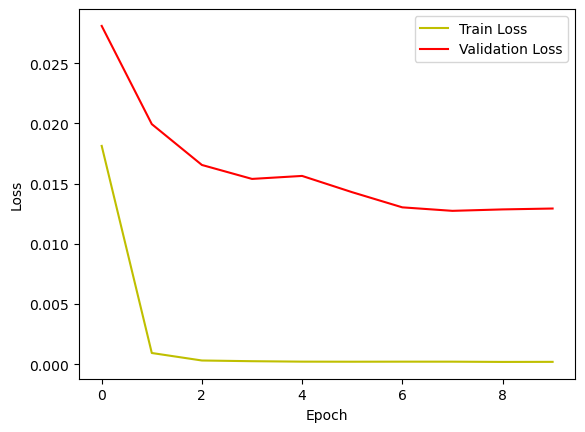

In [94]:
# 학습 과정 살펴보기
plt.plot(history.history['loss'],'y', label='Train Loss')
plt.plot(history.history['val_loss'],'r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

24/24 [==============================] - 3s 48ms/step


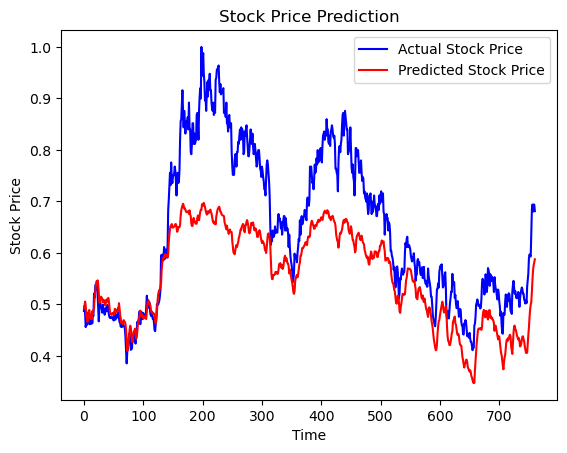

In [95]:
# 예측 수행
y_pred = model.predict(testX)

# 결과 그래프
plt.plot(testY, color='blue', label='Actual Stock Price')
plt.plot(y_pred, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.show()

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 예측 수행
y_pred = model.predict(testX)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(testY, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# 평균 제곱근 오차 (RMSE)예측값과 실제값의 차이의 크기 

24/24 [==============================] - 1s 49ms/step
Root Mean Squared Error (RMSE): 0.11373440434128776


In [97]:
import numpy as np

def calculate_mape(testY, y_pred):
    actual_values = np.array(testY)
    predicted_values = np.array(y_pred)

    # Calculate absolute percentage errors
    absolute_errors = np.abs((testY - y_pred) / testY)

    # Calculate mean absolute percentage error
    mape = np.mean(absolute_errors) * 100

    return mape

mape = calculate_mape(testY, y_pred)
print(f"MAPE: {mape}%")

#예측 값과 실제 값 사이의 절대 오차의 평균을 계산
#정확도는 86.91% /100% - MAPE

MAPE: 13.091565163749788%
